<a href="https://colab.research.google.com/github/AmirhosseinSalamirad/House-Price-Valuation/blob/main/Kaggle%20HPV%20Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Valuation Competition on Kaggle

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


# House Prices
Data set is [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
import pandas as pd
import numpy as np
import os
TRAIN_PATH = '../input/house-prices-advanced-regression-techniques'
TEST_PATH = '../input/house-prices-advanced-regression-techniques'
def load_houses_data(TRAIN_PATH=TRAIN_PATH, TEST_PATH=TEST_PATH):
    train_csv = os.path.join(TRAIN_PATH, 'train.csv')
    test_csv = os.path.join(TEST_PATH, 'test.csv')
    return pd.read_csv(train_csv), pd.read_csv(test_csv)

In [ ]:
X_train, X_test = load_houses_data()
y_train = X_train['SalePrice']
y_train_first = y_train

In [ ]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
X_train.std()

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

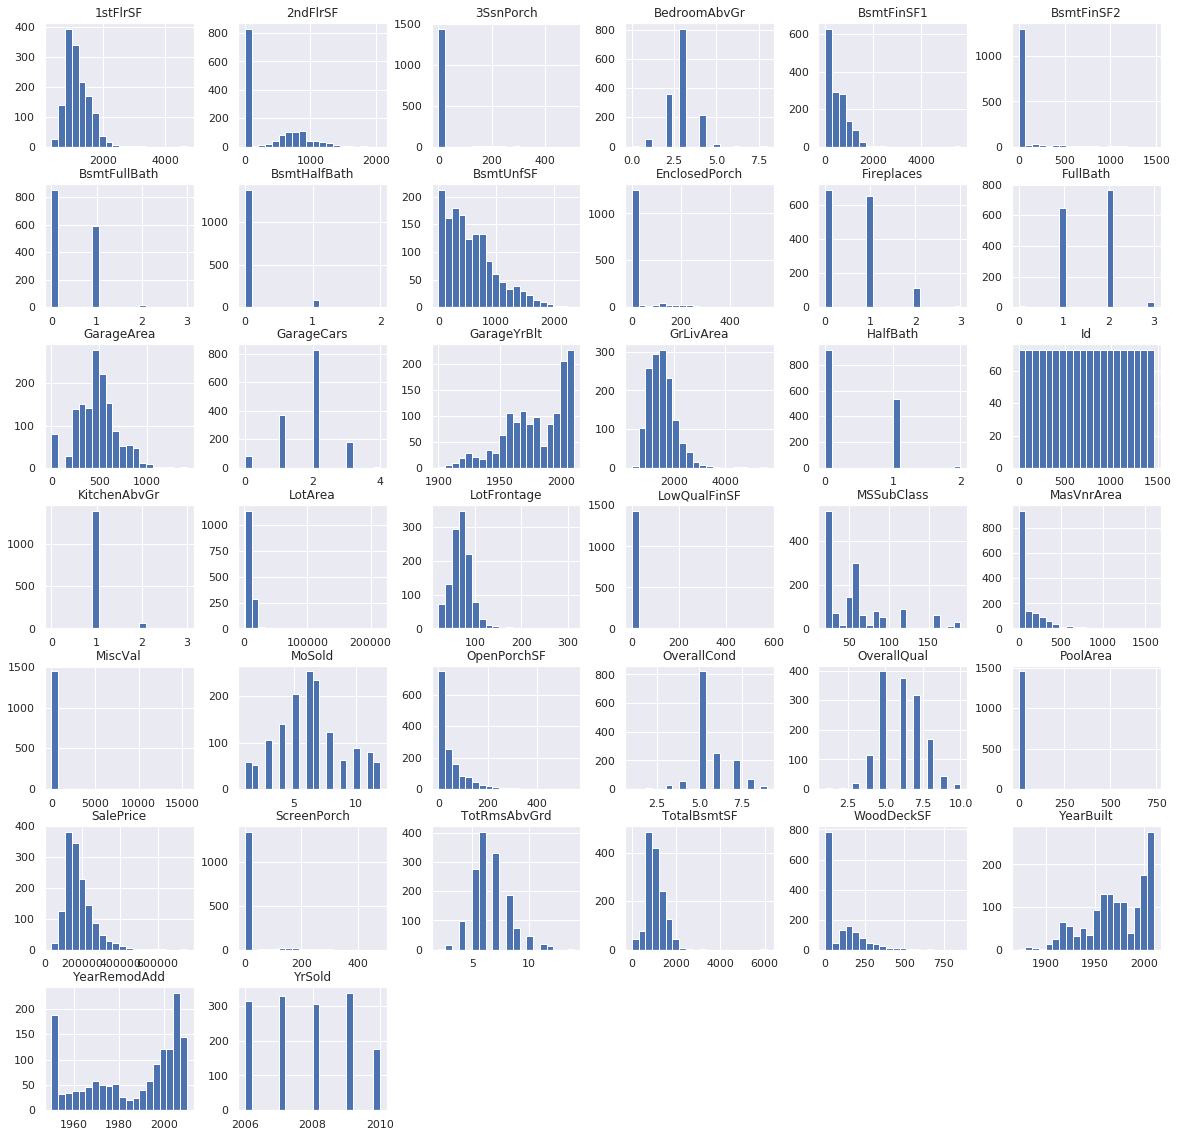

In [ ]:
X_train.hist(figsize=(20, 20), bins=20)
plt.show()

In [ ]:
X_train['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [ ]:
np.unique(X_train['BedroomAbvGr'].values)

array([0, 1, 2, 3, 4, 5, 6, 8])

In [ ]:
X_train.groupby('BedroomAbvGr').count()['Id']

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

In [ ]:
X_train.groupby('BsmtFullBath').count()['Id']

BsmtFullBath
0    856
1    588
2     15
3      1
Name: Id, dtype: int64

In [ ]:
X_train[['TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']].head()

,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF
0,856,0,706,150
1,1262,0,978,284
2,920,0,486,434
3,756,0,216,540
4,1145,0,655,490


In [ ]:
X_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].describe()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,21.954110,3.409589,15.060959
std,66.256028,61.119149,29.317331,55.757415
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000
75%,68.000000,0.000000,0.000000,0.000000
max,547.000000,552.000000,508.000000,480.000000


In [ ]:
X_train[['GarageType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
GarageType    1379 non-null object
dtypes: object(1)
memory usage: 11.5+ KB


In [ ]:
X_train.groupby('GarageFinish').count()['Id'] # Let it be in our dataset

GarageFinish
Fin    352
RFn    422
Unf    605
Name: Id, dtype: int64

In [ ]:
X_train.corr()['GarageArea']['GarageCars']

0.8824754142814603

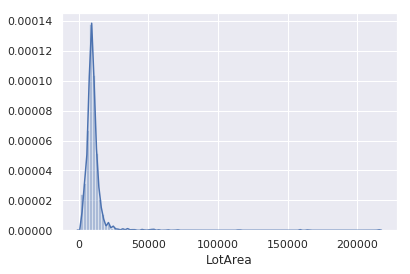

In [ ]:
sns.distplot(X_train['LotArea'], bins=100)

In [ ]:
X_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fd8c7518>]],
      dtype=object)

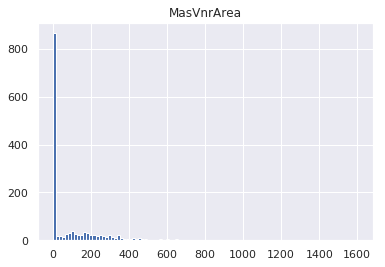

In [ ]:
X_train[['MasVnrArea']].hist(bins=100)

* should drop id.
* almost all 3SsnPorch are zero and we can delete it.
* we can group rooms 5 or more into one single column.
* can merge full and half bathrooms into one filed name bathroom
* we can drop two type of finished and have one finished basement feet
* we can change basement unfinished into a fraction of finished/unfinished (It got bad correlation)
* can merge porchs into one field.
* garage year built can be droped and have a single year built for house.
* we could have just garage area between cars and area.
* we cad drop kitchen also. becasue a bunch of them are one.
* can filter Lot Area above 50000 to 50001
* we **can** drop MSSubClass, OverallCond, YrSold, LowQualFinSF, Id, MiscVal, BsmtHalfBath, BsmtFinSF2, 3SsnPorch, MoSold, PoolArea because of their corrolation
* It's not important when it was sold. So we drop MoSold and YrSold.
* Overall Qual is important but Overall cond not!
* We can add a luxury style field to show having pool or not and other fantasy features.
* we can have just one of YearRemodAdd or YearBuilt.


In [ ]:
X_train['YrSold'] = X_train['YrSold'].astype(str)
X_train['MoSold'] = X_train['MoSold'].astype(str)

In [ ]:
label_attrs = X_train.select_dtypes([object]).columns.values
num_attrs = X_train.select_dtypes([np.int64, np.float64]).columns.values
num_attrs = num_attrs[~(num_attrs == 'SalePrice')]

### Normalize Sale Price


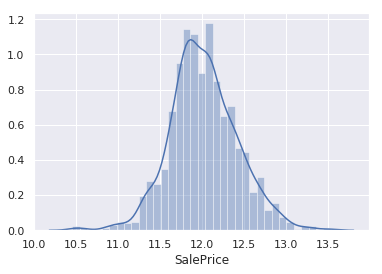

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
import seaborn as sns
class Normalize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = y_train.copy()
        dataset = np.log1p(dataset)
        return dataset
y_train = Normalize().transform(y_train)
sns.distplot(y_train)


In [ ]:
X_train_label = X_train[label_attrs]
X_train_num = X_train[num_attrs]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_num_std = pd.DataFrame(StandardScaler().fit_transform(X_train_num), columns=X_train_num.columns)

## Colinearity

In [ ]:
cols = X_train_num_std.columns

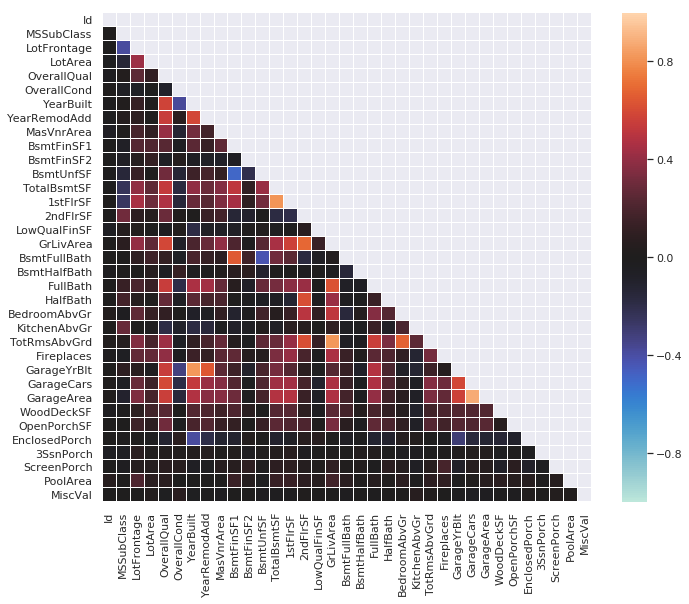

In [ ]:
corr = X_train_num_std.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 ,
            square=True, linewidths=.005)

Its hard to select from them by eye. so we filter it!

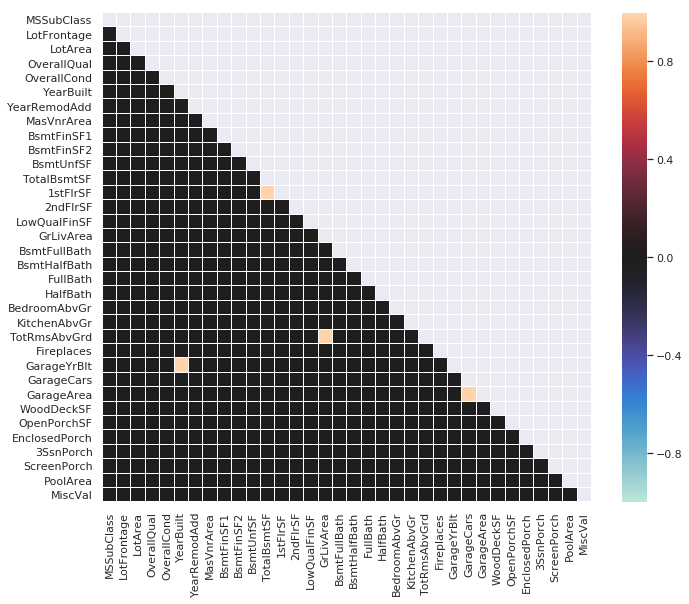

In [ ]:
corr = corr.iloc[1:, 1:]
corr = corr.applymap(lambda x : 1 if x > 0.75 else -1 if x < -0.75 else 0)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 ,
            square=True, linewidths=.005)

In [ ]:
X_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

* We should drop from orange blocks
* `GarageCars` should remain, and `GarageArea` should be deleted.
* `GrLivArea` should remain, and `BedroomAbvGr` and `TotRmsAbvGrd` should be deleted.
* `TotalBsmtSF` should remain, and `1stFlrSF` should be deleted.
* `YearBuilt` should remain, and `GarageYrBlt` should be deleted.

In [ ]:
num_colinear_drop_attrs = ['GarageArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF']

## Work With Numbers

### Merge FullBath and HalfBath

In [ ]:
class MergeBath(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Bath'] = X['HalfBath'] * X['FullBath']
        X['HalfBath2'] = X['HalfBath'] ** 2
        X['FullBath2'] = X['FullBath'] ** 2
        X['BsmtBath'] = X['BsmtHalfBath'] * X['BsmtFullBath']
        X['BsmtHalfBath2'] = X['BsmtHalfBath'] ** 2
        X['BsmtFullBath2'] = X['BsmtFullBath'] ** 2
        return X
X_num_merged = MergeBath().transform(X_train_num)

### Merge BsmntFS and add Unfinished Fraction

In [ ]:
class MergeBsmntFs(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['BsmtFinSF'] = X['BsmtFinSF1'] * X['BsmtFinSF2']
        X['BsmtFinSF12'] = X['BsmtFinSF1'] ** 2
        X['BsmtFinSF22'] = X['BsmtFinSF2'] ** 2
        return X
X_num_bsmnt_proved = MergeBsmntFs().transform(X_num_merged)

### Merge Porchs

In [ ]:
# PolynomialFeatures?
class MergePorches(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Porch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
        X.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
        return X
X_num_porch_merged = MergePorches().transform(X_num_bsmnt_proved)

### Filter Lot Area above 50000 and Room above 5

In [ ]:
class FilterLotAreaAndRooms(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['LotArea'] = X['LotArea'].apply(lambda l: 50001 if l > 50000 else l)
        X['BedroomAbvGr'] = X['BedroomAbvGr'].apply(lambda l: 5 if l > 5 else l)
        return X
X_num_lot_filtered = FilterLotAreaAndRooms().transform(X_num_porch_merged)

### Merge Lots


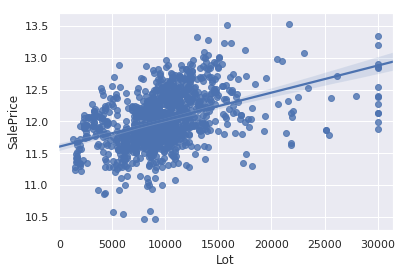

In [ ]:
class MergeLots(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['Lot'] = X['LotArea'] + X['LotFrontage']
        X.drop(['LotArea', 'LotFrontage'], axis=1, inplace=True)
        X['Lot'] = X['Lot'].apply(lambda l: 30000 if l > 30000 else l)
        return X
X_num_lots_merged = MergeLots().transform(X_num_lot_filtered)
sns.regplot(x='Lot', y=y_train, data = X_num_lots_merged)

### Linearing And Removing Outliers

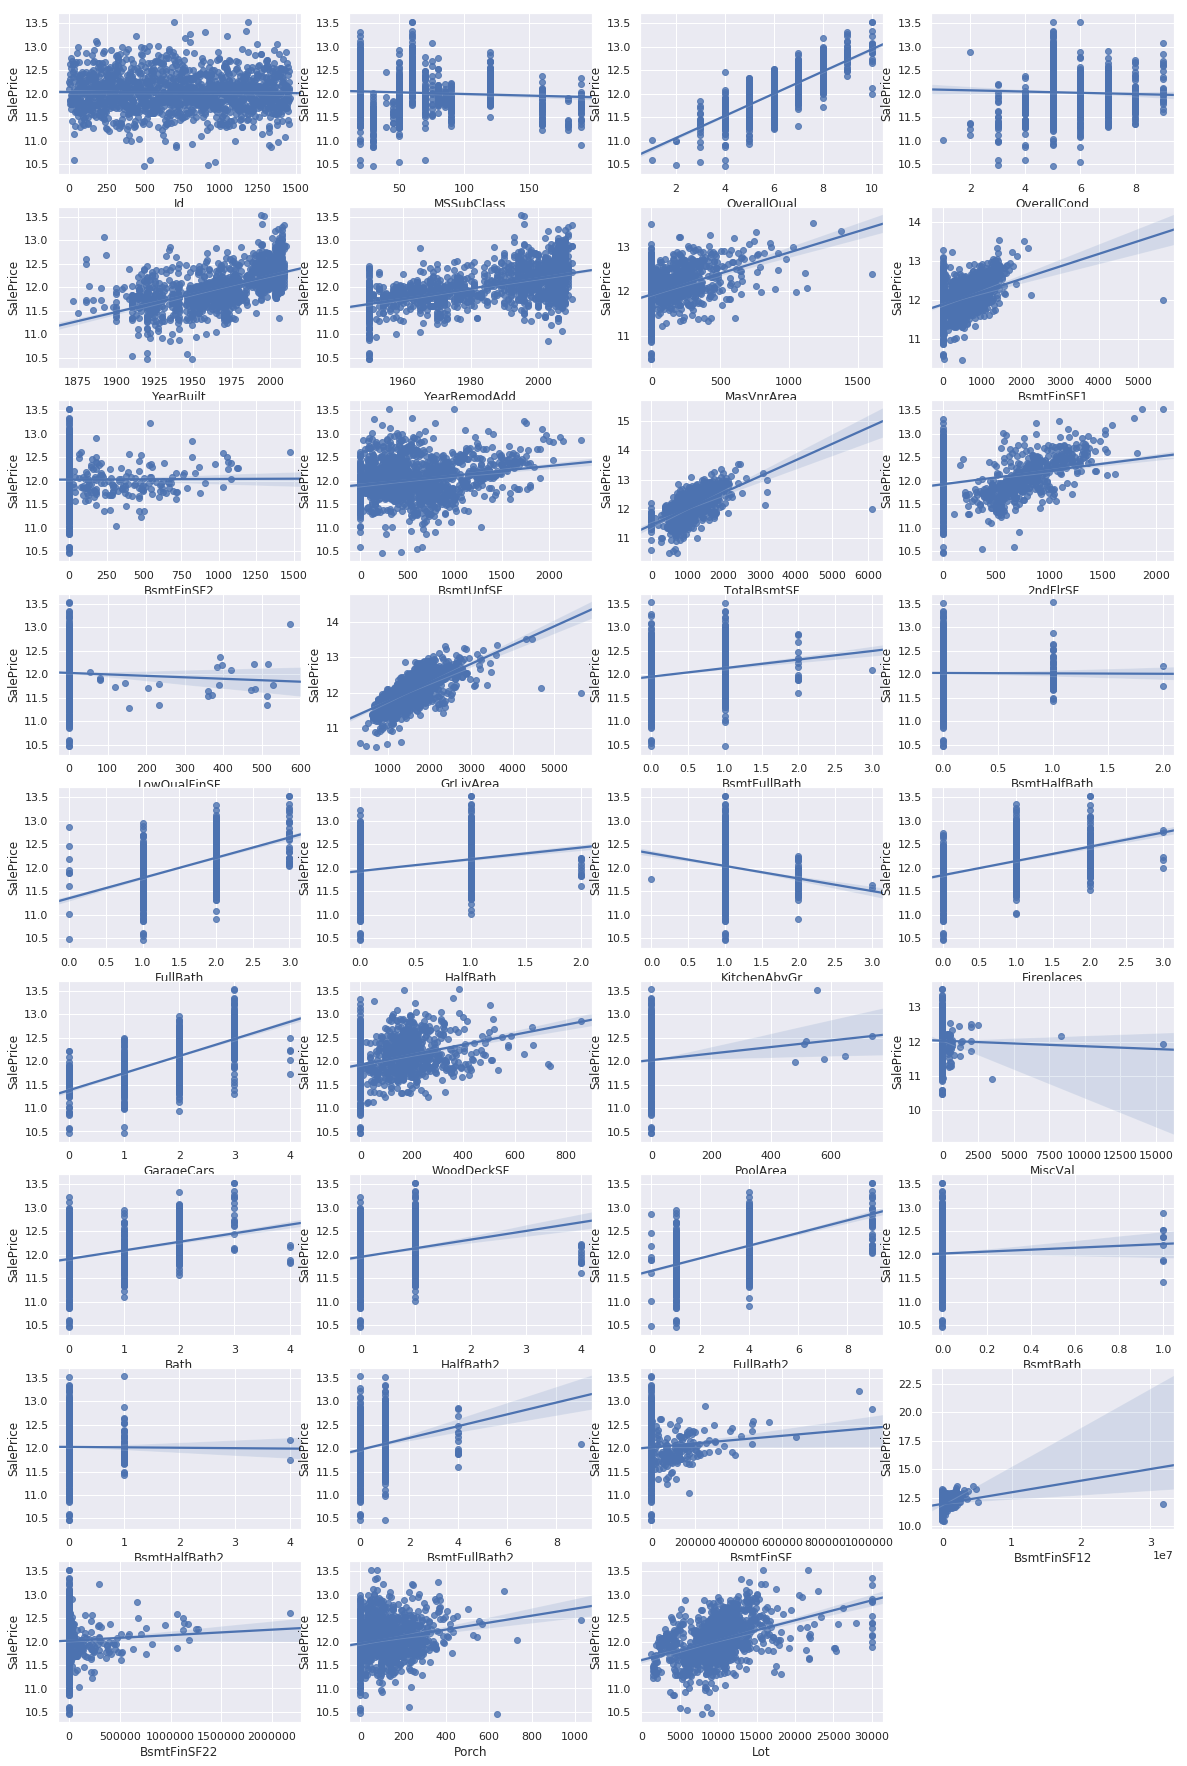

In [ ]:
i = 1;
plt.figure(figsize=(20, 35))
for col in X_num_lots_merged.drop(num_colinear_drop_attrs, axis=1):
    if col is not 'Id' and col is not 'SalePrice':
        plt.subplot(10, 4, i)
        sns.regplot(x=col, y=y_train, data=X_num_lots_merged)
        i = i+1

In [ ]:
num_scatter_drop = ['MSSubClass', 'LowQualFinSF']

In [ ]:
to_delete_outlires = ['GrLivArea', 'OverallCond', 'BsmtFinSF1', 'GarageCars',
                      '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'] #Think about garage cars

In [ ]:
from sklearn.impute import SimpleImputer
X_train_num_std_imputed = pd.DataFrame(SimpleImputer().fit_transform(X_train_num_std),
                                       columns= X_train_num_std.columns)

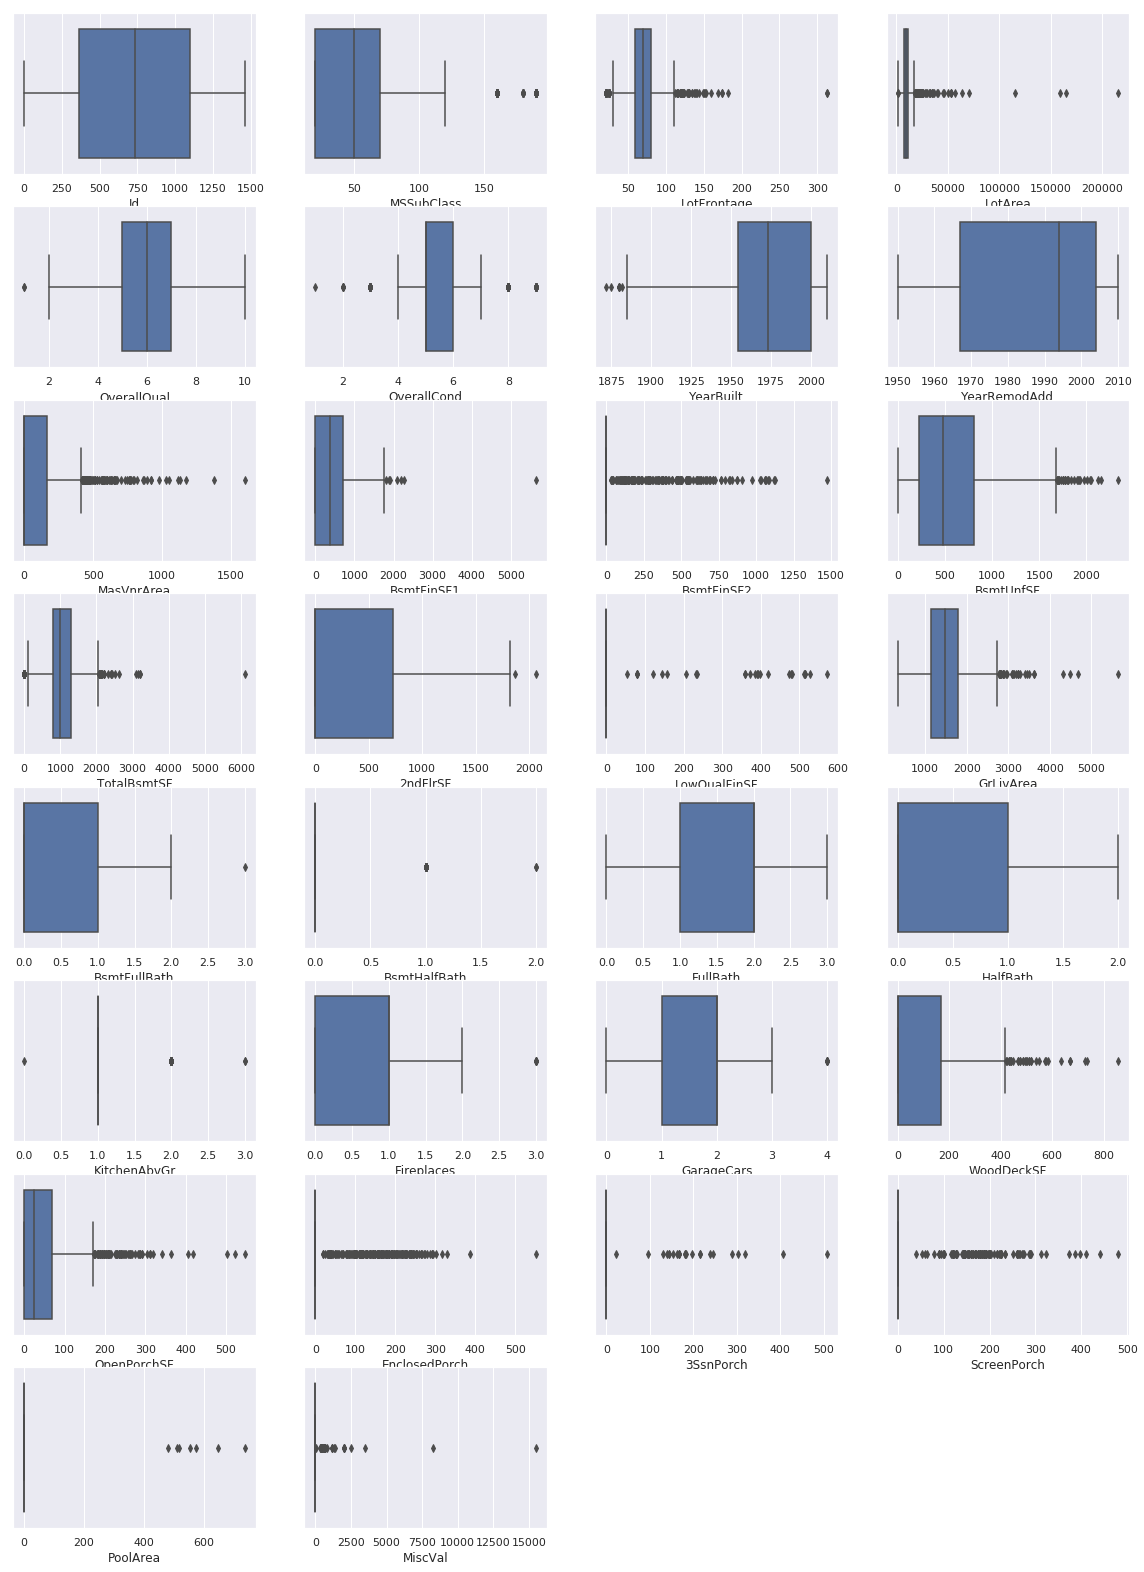

In [ ]:
i = 1;
plt.figure(figsize=(20, 35))
for col in X_train_num.drop(num_colinear_drop_attrs, axis=1):
    if col is not 'Id' and col is not 'SalePrice':
        plt.subplot(10, 4, i)
        sns.boxplot(x=X_train[col])
        i = i+1

In [ ]:
from scipy import stats
import numpy as np
z = pd.DataFrame(np.abs(stats.zscore(X_train_num)), columns=X_train_num.columns)

In [ ]:
X_train.shape

(1460, 81)

In [ ]:
X_train_without_outlier = X_train[(z[to_delete_outlires] < 3).all(axis=1)]

In [ ]:
y_train_without_outlier = y_train[(z[to_delete_outlires] < 3).all(axis=1)]

In [ ]:
X_train_without_outlier.shape

(1411, 81)

In [ ]:
# sns.distplot(X_train_num_std_imputed.LotFrontage)

### Dropping

In [ ]:
class DataFrameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs=[]):
        self.drop_attrs = drop_attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.drop_attrs, axis=1, inplace=True, errors='ignore')
        return X

In [ ]:
num_drop_attrs = num_scatter_drop + num_colinear_drop_attrs
X_num_dropped = DataFrameDropper(num_drop_attrs).transform(X_num_lot_filtered)

## Work With Labels

In [ ]:
X_train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

### Dropping very null attributes

In [ ]:
label_drop_attrs = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] # Think about FireplaceQu
X_label_dropped = DataFrameDropper(label_drop_attrs).transform(X_train_label)

### Impute

In [ ]:
from sklearn.impute import SimpleImputer
X_label_imputed = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(X_label_dropped.values),
                               columns=X_label_dropped.columns)

### Encoding Label

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class OneHotGoodEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder()
    def fit(self, X, y=None):
        self.encoder.fit(X)
    def transform(self, X, y=None):
        columns = X.columns
        X_transformed = self.encoder.transform(X).toarray()
        cats = self.encoder.categories_
        i = 0
        labels = []
        for cat in cats:
            for c in cat:
                labels.append(columns[i] + ' : ' + c)
            i = i+1
        return pd.DataFrame(X_transformed, columns=labels)


In [ ]:
encoder = OneHotGoodEncoder()
encoder.fit(X_label_imputed)
X_label_encoded = encoder.transform(X_label_imputed)

### Analys labels using p-value


In [ ]:
from sklearn.feature_selection import f_regression
F, p_value = f_regression(X_label_encoded, y_train)
np.array(X_label_encoded.columns) + " = " + (p_value < 0.05).astype(str)

array(['MSZoning : C (all) = True', 'MSZoning : FV = True',
       'MSZoning : RH = True', 'MSZoning : RL = True',
       'MSZoning : RM = True', 'Street : Grvl = True',
       'Street : Pave = True', 'LotShape : IR1 = True',
       'LotShape : IR2 = True', 'LotShape : IR3 = False',
       'LotShape : Reg = True', 'LandContour : Bnk = True',
       'LandContour : HLS = True', 'LandContour : Low = False',
       'LandContour : Lvl = False', 'Utilities : AllPub = False',
       'Utilities : NoSeWa = False', 'LotConfig : Corner = False',
       'LotConfig : CulDSac = True', 'LotConfig : FR2 = False',
       'LotConfig : FR3 = False', 'LotConfig : Inside = True',
       'LandSlope : Gtl = False', 'LandSlope : Mod = False',
       'LandSlope : Sev = False', 'Neighborhood : Blmngtn = False',
       'Neighborhood : Blueste = False', 'Neighborhood : BrDale = True',
       'Neighborhood : BrkSide = True', 'Neighborhood : ClearCr = True',
       'Neighborhood : CollgCr = True', 'Neighborhood : C

If all classes of a category was false we will delete it.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, OrdinalEncoder
encoder = OrdinalEncoder()
X_label_encoded = pd.DataFrame(OrdinalEncoder().fit_transform(X_label_imputed), columns=X_label_imputed.columns)

### Analys Labels

In [ ]:
X_label_analys = X_label_encoded.copy()
X_label_analys['PriceSale'] = y_train.values

In [ ]:

label_new_drop_attrs = ['Utilities', 'LandSlope', 'YrSold', 'MoSold']
X_label_new_analys = DataFrameDropper(label_new_drop_attrs).transform(X_label_analys)

## Create Pipeline

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attrs]
class LabelBinarizerPipelineFriendly(OneHotEncoder):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly,self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X).toarray()
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)



In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer


num_pipeline = Pipeline([
    ('selection', DataFrameSelector(num_attrs)),
    ('merge_bath', MergeBath()),
    ('merge_bsmnt', MergeBsmntFs()),
    ('merge_porch', MergePorches()),
    ('filter', FilterLotAreaAndRooms()),
    ('drop', DataFrameDropper(num_drop_attrs)),
    ('impute', SimpleImputer()),
    ('std_scale', StandardScaler()),
])

label_pipeline = Pipeline([
    ('selection', DataFrameSelector(label_attrs)),
    ('drop', DataFrameDropper(label_new_drop_attrs)),
    ('impute', SimpleImputer(strategy="most_frequent")),
#     ('encode', OrdinalEncoder()), # one hot is  better
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('std_scale', StandardScaler()),
])

full_pipeline = FeatureUnion([
    ('num_pipline', num_pipeline),
    ('label_pipeline', label_pipeline),
])


X_train_cleaned = pd.DataFrame(full_pipeline.fit_transform(X_train_without_outlier))

In [ ]:
y_train = y_train_without_outlier

In [ ]:
X_train_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-1.730383,-0.218857,-0.288373,0.693498,-0.534116,1.056186,0.892129,0.573115,0.640496,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
1,-1.728011,0.503272,-0.077631,-0.051194,2.432961,0.131759,-0.412271,-0.588816,1.282978,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
2,-1.725639,-0.074431,0.224737,0.693498,-0.534116,0.987710,0.843818,0.371555,0.120842,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
3,-1.723267,-0.459567,-0.086794,0.693498,-0.534116,-1.956761,-0.702137,-0.588816,-0.516916,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,3.743079,-0.053319,-0.088641,-0.119909,-2.165529,-0.303488
4,-1.720895,0.695839,0.776329,1.438190,-0.534116,0.953472,0.747196,1.486060,0.520031,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488


## Train Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_cleaned, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

def analys_model(model):
    some_data = X_train.iloc[:5]
    some_label = y_train.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)
    print(f"\x1b[31mPredictions are \033[92m{model.predict(some_data_prepared)}")
    print(f"\x1b[31mLables are \033[92m{list(some_label)}")
    housing_prediction = model.predict(X_train_cleaned)
    scores = cross_validate(model, X_train_cleaned, y_train, scoring="neg_mean_squared_error", cv=3)
    rmse_scores = np.sqrt(-scores['test_score'])
    print(f"\x1b[31mScores : \033[92m{rmse_scores}")
    print(f"\x1b[31mMean : \033[92m{rmse_scores.mean()}")
    print(f"\x1b[31mStandard Deviation : \033[92m{rmse_scores.std()}")

In [ ]:
    analys_model(linear_model)

Predictions are [12.23186066 12.22917511 12.26982453 12.00490143 12.5569339 ]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [9.36298739e+11 1.69851390e+10 6.26316187e+09]
Mean : 319849013230.9671
Standard Deviation : 435917758549.5398


## Train SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
sgd_grid = {
    'n_iter_no_change': [10, 20, 30, 40, 50, 60, 80, 100, 130, 140],
    'eta0': [0.4, 0.2, 0.1, 0.05, 0.03, 0.01, 0.009, 0.004],
}
sgd_model = SGDRegressor()
sgd_best = RandomizedSearchCV(sgd_model, sgd_grid, verbose=2, cv=3,n_jobs=-1,
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_

sgd_best
sgd_best.fit(X_train_cleaned, y_train)
analys_model(sgd_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.0s finished


Predictions are [12.2289335  12.29094284 12.2675462  12.00091501 12.58932231]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [5.25502714e+06 2.09643265e+03 2.84259966e+00]
Mean : 1752375.4717879249
Standard Deviation : 2476748.8942858046


Because sgd is also a linear model but with selection of theta using stochastic gradient it should not go very better than linear regression.

## Train Polynomial Regression


Predictions are [12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [5.33687229e+11 1.99475445e+10 3.38778673e+12]
Mean : 1313807167827.7957
Standard Deviation : 1481446485568.4277


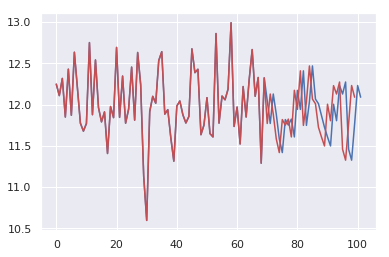

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=2, include_bias=False)),
    ('std_scale', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_model.fit(X_train_cleaned, y_train)
analys_model(poly_model)
plt.plot(y_train[:100])
plt.plot(poly_model.predict(X_train_cleaned[:100]), 'r')

It seems polynomial regression overfitted. With more degrees also it doesnt get better and get very slow.

# Regularized Linear Models
## TrainRidge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_grid = {
    'alpha': np.linspace(0, 1, num=500),
    'solver' : ['cholesky'],
}
ridge_model = Ridge()
ridge_best =  RandomizedSearchCV(ridge_model, ridge_grid, verbose=2, cv=3,n_jobs=-1,
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
ridge_best.fit(X_train_cleaned, y_train)
analys_model(ridge_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.23590119 12.20833198 12.2726027  12.0073411  12.55833125]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.12140164 0.13436661 0.11749291]
Mean : 0.1244203870523828
Standard Deviation : 0.007211798513506967


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


## Train Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_grid = {
    'alpha': np.linspace(0, 1e-3, num=1000),
}
lasso_model =  Lasso()
lasso_best =  RandomizedSearchCV(lasso_model, lasso_grid, verbose=2, cv=3,n_jobs=-1,
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
lasso_best.fit(X_train_cleaned, y_train)
analys_model(lasso_best)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished


Predictions are [12.23367899 12.18780354 12.27614631 12.04447408 12.55405163]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.11160681 0.12356065 0.11047178]
Mean : 0.11521308206894698
Standard Deviation : 0.005920780388082012


In [ ]:
from sklearn.linear_model import LassoLars
lasso_lars_grid = {
    'alpha': np.linspace(0, 1e-3, num=10000),
    'max_iter' : [int(x) for x in np.linspace(1, 110, num = 100)]
}
lasso_lars_model = LassoLars()
lasso_lars_best =  RandomizedSearchCV(lasso_lars_model, lasso_lars_grid, verbose=2, cv=3,n_jobs=-1,
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
lasso_lars_best.fit(X_train_cleaned, y_train)
analys_model(lasso_lars_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


Predictions are [12.23688704 12.1281662  12.28046672 12.07141693 12.54820738]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.1090812  0.12199933 0.1119109 ]
Mean : 0.11433047619770836
Standard Deviation : 0.0055443816458916675


### Try to boost with gradient method

In [ ]:
from sklearn.base import clone
class GradientBoostingOtherRegressor(TransformerMixin, BaseEstimator):
    def __init__(self, estimator, n_estimates = 3):
        self.estimator = estimator
        self.estimators = []
        self.n_estimates = n_estimates
    def fit(self, X, y_train=None):
        last_estimator = self.estimator
        last_estimator.fit(X, y_train)
        y = y_train.values
        self.estimators.append(last_estimator)
        for i in range(self.n_estimates):
            y = y - last_estimator.predict(X)
            new_estimator = clone(self.estimator)
            new_estimator.fit(X, y)
            last_estimator = new_estimator
            self.estimators.append(last_estimator)
        return self
    def predict(self, X_test):
        y_pred = sum(tree.predict(X_test) for tree in self.estimators)
        return y_pred

In [ ]:
gbor = GradientBoostingOtherRegressor(ridge_best, n_estimates=4)
gbor.fit(X_train_cleaned, y_train)
analys_model(gbor)

Predictions are [12.23581695 12.20867685 12.272321   12.00655308 12.55853232]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.12173144 0.13473348 0.11780722]
Mean : 0.12475737842822886
Standard Deviation : 0.007233800092765899


## Train Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_grid = {
    'alpha': np.linspace(0, 1e-2, num=10000),
    'l1_ratio' : np.linspace(0, 1, num=10)
}
elastic_model = ElasticNet()
elastic_best =  RandomizedSearchCV(elastic_model, elastic_grid, verbose=2, cv=3,n_jobs=-1,
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
elastic_best.fit(X_train_cleaned, y_train)
analys_model(elastic_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


Predictions are [12.2244327  12.14559462 12.26912551 12.05789121 12.54865115]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10469217 0.11931235 0.10721739]
Mean : 0.11040730399219567
Standard Deviation : 0.0063806536861572664


## Train SVM Regression

In [ ]:
from sklearn.svm import SVR

### SVM - Linear

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_linear_grid = {
    'epsilon' : np.linspace(0, 0.5, num=200),
}
svm_linear_model = SVR(kernel='linear')
svm_linear_best = RandomizedSearchCV(svm_linear_model, svm_linear_grid, verbose=2, cv=3, n_jobs=-1,
                              scoring='neg_mean_squared_error').fit(X_train_cleaned, y_train).best_estimator_
svm_linear_best.fit(X_train_cleaned, y_train)
analys_model(svm_linear_best)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Predictions are [12.23757138 12.148076   12.27956048 11.99079269 12.54553778]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.11646241 0.13691907 0.11640009]
Mean : 0.12326052504127051
Standard Deviation : 0.009658086468016216


### SVM - Poly

In [ ]:
svm_poly_grid = {
    'epsilon' : np.linspace(0, 0.5, num=200),
}
svm_poly_model = SVR(kernel='poly')
svm_poly_best = RandomizedSearchCV(svm_poly_model, svm_poly_grid, verbose=2, cv=3, n_jobs=-1,
                              scoring='neg_mean_squared_error').fit(X_train_cleaned, y_train).best_estimator_
svm_poly_best.fit(X_train_cleaned, y_train)
analys_model(svm_poly_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.2s finished


Predictions are [12.24464578 12.07383223 12.33535528 11.88457511 12.47353942]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.16730797 0.18643749 0.16955888]
Mean : 0.17443477806727456
Standard Deviation : 0.008536797999744418


## Train Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_cleaned, y_train)

max_features = [int(x) for x in np.linspace(1, 270, num = 30)]
max_depth = [1, 2, 4, 5, 6, 9, 10, 12 , None]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 5)]
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

random_search =  RandomizedSearchCV(estimator = dt_model, param_distributions = random_grid,
                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")
random_search.fit(X_train_cleaned, y_train)
dt_best = random_search.best_estimator_
dt_best.fit(X_train_cleaned, y_train)
analys_model(dt_best)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.26450721 12.10818682 12.26450721 11.85374853 12.43955969]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.18590619 0.17493856 0.17466551]
Mean : 0.17850342331132685
Standard Deviation : 0.005235736026859632


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.6s finished


### Boost Decison Tree


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
dt_ada_model = AdaBoostRegressor(dt_best, n_estimators=200, learning_rate=0.5)
dt_ada_model.fit(X_train_cleaned, y_train)
analys_model(dt_ada_model)

Predictions are [12.21842855 12.06849579 12.27376021 11.94210098 12.50186841]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.13747547 0.14340645 0.12619319]
Mean : 0.13569170493143376
Standard Deviation : 0.007139585525062635


## Train Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
max_features = ['auto', 10, 20, 40, 90, 140, 200, 250]
max_depth = [int(x) for x in np.linspace(1, 1000, num = 20)]
max_depth.append(None)
min_samples_leaf = [5, 10, 15]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [ ]:
random_search =  RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")
random_search.fit(X_train_cleaned, y_train)

In [ ]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train_cleaned, y_train)
analys_model(rf_best)

Predictions are [12.24456668 12.0886768  12.30688883 11.95309865 12.49061427]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.13096035 0.14425147 0.1251556 ]
Mean : 0.1334558045047329
Standard Deviation : 0.007993060323883467


### Boost Random Forest

* First we use ada boost with our random

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
dt_ada_model = AdaBoostRegressor(rf_best, n_estimators=10, learning_rate=0.5)
dt_ada_model.fit(X_train_cleaned, y_train)
analys_model(dt_ada_model)

Predictions are [12.23667301 12.05775405 12.28388977 11.90015426 12.49064317]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.12781067 0.14254097 0.12251457]
Mean : 0.1309554035137417
Standard Deviation : 0.00847274776280161


* Then try a gradient boost with a weak random forest ( max_depth = 5 ); also, we try to find number of estimator with early stoping.

Predictions are [12.24672623 12.10248834 12.29098277 11.86317542 12.46816519]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.11853979 0.1324085  0.12973649]
Mean : 0.1268949252147885
Standard Deviation : 0.006007836827081139
min estimator 422


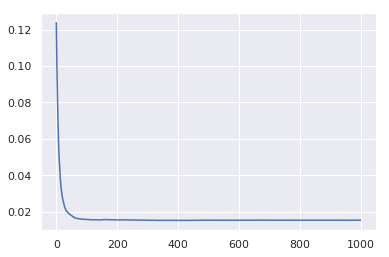

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(X_train_cleaned, y_train, random_state=42, test_size=0.2)

gradient_reg = GradientBoostingRegressor(
    n_estimators=1000,
    random_state=42,
    learning_rate=0.1,
    min_samples_split=10,
    max_features='sqrt',
    max_depth=5
)
gradient_reg.fit(X_t, y_t)

errors = [mean_squared_error(y_v, y_pred) for y_pred in gradient_reg.staged_predict(X_v)]
best_n_estimators = np.argmin(errors)

plt.plot(errors)

gradient_best = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    random_state=42,
    learning_rate=0.1,
    min_samples_split=10,
    max_features='sqrt',
    max_depth=5
)
gradient_best.fit(X_train_cleaned, y_train)

analys_model(gradient_best)

print(f'min estimator {best_n_estimators}')


# Ensemble Methods

## Voting

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_model = VotingRegressor(
    estimators=[('ridge', ridge_best), ('lasso', lasso_best), ('elastic', elastic_best), ('svm', svm_linear_best),
               ('rf', gradient_best), ('dt', dt_ada_model)],
    n_jobs=-1
)
voting_model.fit(X_train_cleaned, y_train)
analys_model(voting_model)

Predictions are [12.23692953 12.145531   12.28261967 11.97717569 12.52848786]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10454213 0.12230598 0.10617995]
Mean : 0.11100935124206424
Standard Deviation : 0.008015855639347142


## Stacking Our Model


In [ ]:
from sklearn.model_selection import KFold
from sklearn.base import clone, RegressorMixin
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    def fit(self, X, y=None):
        X = X.values
        y = y.values
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    def get_metafeatures(self, X):
        return np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = [gradient_best, dt_ada_model, elastic_best, lasso_lars_best, svm_linear_best],
                                                 meta_model = LinearRegression())
stacked_averaged_models.fit(X_train_cleaned, y_train)

StackingAveragedModels(base_models=[GradientBoostingRegressor(alpha=0.9,
                                                              criterion='friedman_mse',
                                                              init=None,
                                                              learning_rate=0.1,
                                                              loss='ls',
                                                              max_depth=5,
                                                              max_features='sqrt',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=10,
                             

In [ ]:
meta_features = pd.DataFrame(stacked_averaged_models.get_metafeatures(X_train_cleaned))


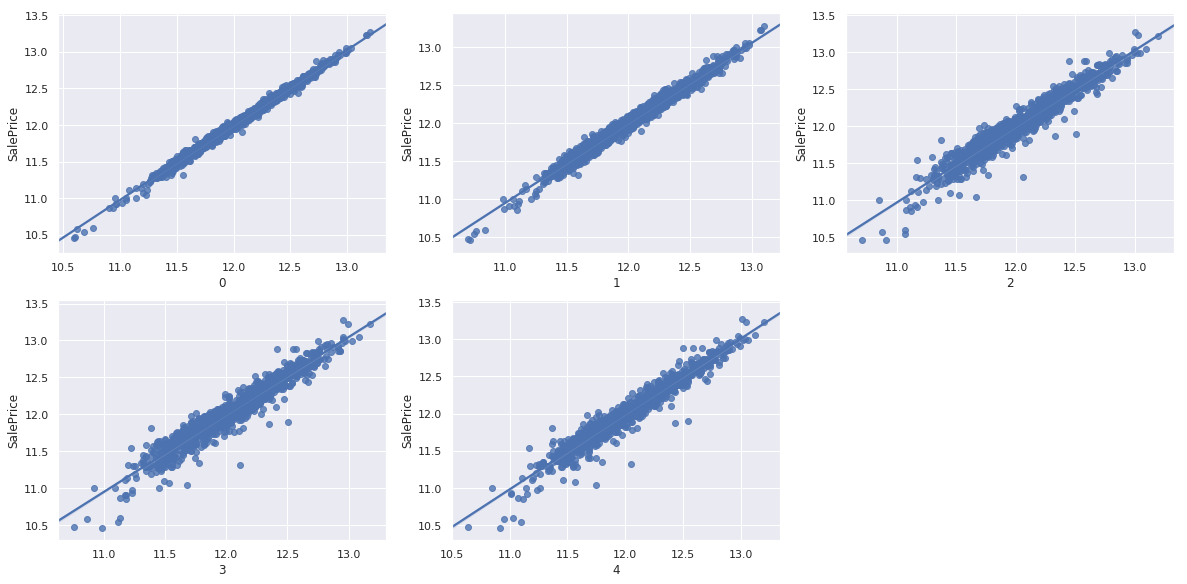

In [ ]:
i = 0;
plt.figure(figsize=(20, 15))
for col in meta_features:
    plt.subplot(3, 3, i+1)
    sns.regplot(x=meta_features[i], y=y_train)
    i = i+1

In [ ]:
analys_model(stacked_averaged_models)

Predictions are [12.23815143 12.13782176 12.28713016 12.0032658  12.5495546 ]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10219581 0.11899886 0.10466267]
Mean : 0.10861911248393515
Standard Deviation : 0.007408359528653335


#Deep Learning Part


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns =None


In [ ]:
training = pd.read_csv("train.csv")
testing = pd.read_csv('test.csv')
Id = testing[['Id']].values # we need to keep it for the submission file
training = training.drop(['Id'],axis = 1)
testing = testing.drop(['Id'],axis =1)

In [ ]:
testing.shape

In [ ]:
training.shape

In [ ]:
training.head()

In [ ]:
training['SalePrice'].describe()


In [ ]:
sns.distplot(training['SalePrice'])


In [ ]:
print("Skewness: %f" % training['SalePrice'].skew())
print("Kurtosis: %f" % training['SalePrice'].kurt())

In [ ]:
# Correlation Matrix
corrmat = training.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)

In [ ]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(training[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True, annot = True, square = True, fmt = '.2f',
                annot_kws = {'size':10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
# Take only top ten variables correlation coef
t_numeric = training[corrmat.nlargest(k,'SalePrice')['SalePrice'].index]# defining column selection

In [ ]:
t_numeric.head()

In [ ]:
t_categorical = training.select_dtypes(include= 'object')

In [ ]:
t_categorical['SalePrice'] = training['SalePrice']

In [ ]:
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [ ]:
for column in t_categorical:

    if correlation_ratio(t_categorical[column],t_categorical['SalePrice']) > 0.4:
        print(column)
        print(correlation_ratio(t_categorical[column],t_categorical['SalePrice']))

In [ ]:
# According to this findings we are going to use only this categories in our new dataset
t_categorical = t_categorical[['Neighborhood','ExterQual','BsmtQual','KitchenQual']]

In [ ]:
training = pd.concat([t_numeric,t_categorical],axis =1)

In [ ]:
training.head()

In [ ]:
training.shape

In [ ]:
testing.shape

In [ ]:
 Keep in mind that this data set has many features and some of them have most of their data missing
# In this case we are going to handle missing data in a simple way.

total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

# We can see the features with the most missing values
# Folowing the kaggle article "Comprehensive Data Exploration with Python"
# eliminate columns that have more than 1 data missing
# this is a simple but not the best approach since with some extra work filling missing values in the correct way
# can help with increasing the accuracy of the model

# below are out selected features and correspoding missing values

In [ ]:
# Drop the columns containing more than one missing value
# you can choose to leave it and fill the missing fata with the mode since less than 15% is missing
training= training.drop((missing_data[missing_data['Total']>1]).index,1)
training.isnull().sum().max()

In [ ]:
training.head()

In [ ]:
testing.shape

In [ ]:
# for the test data I will remove the comlums that were removed from the training data. We need to do this
# since out model needs the same features to predeict the prices.

Y_training = training[['SalePrice']] # Our label
training = training.drop(['SalePrice'],axis = 1) # our Features

In [ ]:
mylist = training.columns # columns that we want to keep in the testing data
mylist = mylist.values

In [ ]:
testing = testing[mylist] # filter testing data to have only the desired columns

In [ ]:
testing.isna().sum() # check for null values again

In [ ]:
#For this test I will just drop those columns
testing['KitchenQual']=testing['KitchenQual'].fillna(testing['KitchenQual'].mode()[0])
testing['TotalBsmtSF'] =testing['TotalBsmtSF'].fillna(testing['TotalBsmtSF'].mean())
testing.drop(['GarageArea'], axis =1, inplace =True)
training.drop(['GarageArea'], axis = 1, inplace = True)
testing['GarageCars'] =testing['GarageCars'].fillna(testing['GarageCars'].mode()[0])
testing.shape


In [ ]:
training.shape


In [ ]:
Y_training.shape


In [ ]:
Id.shape


In [ ]:
# Getting Dummy variables for the model to be processed by our neural net
training = pd.get_dummies(training)
testing = pd.get_dummies(testing)

In [ ]:
# Check the head and notice the one hot (dummies) as explained above

training.head()

In [ ]:
# Check the head of testing too.

testing.head()

In [ ]:
# Notice that I check the shape repeteadly. I do this to track any mistake when handling the data set
# In case of a shape discrepancy I will go back to see what I did wrong.

testing.shape

In [ ]:
training.shape

In [ ]:
## Convert the train and test data in to np arrays to work as input for the neural net
# Traininng data X and Y
X_training = training.values
X_training = X_training.astype(np.float)
Y_training = Y_training.values
Y_training = Y_training.astype(np.float)

# Testing Data X there is no Y since it is what we want to predict

X_testing = testing.values
X_testing = X_testing.astype(np.float)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(0,1))
Y_scaler = MinMaxScaler(feature_range=(0,1))

X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)

In [ ]:
# To scale the data back we need to keep this constants
print(Y_scaler.scale_[0], Y_scaler.min_[0])

In [ ]:
# Checking the shape of X and Y they must have the same number of rows
X_scaled_training.shape

In [ ]:
Y_scaled_training.shape

In [ ]:
X_scaled_testing.shape

In [ ]:
from tensorflow.keras import layers

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu',input_shape=[41]),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(1, activation = 'linear')
    ])
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer ,
                 loss = 'mse',
                 metrics =['mae','mse'])
    return model

In [ ]:
model= build_model()

In [ ]:
model.summary()

In [ ]:
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Early stoping helps prevent overfitting by stoping training when the validation score does not improve
# patience means the amount of epochs that have to elapse w/o improvement for the call back to stop the training

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 20)

In [ ]:
history = model.fit(X_scaled_training,Y_scaled_training,epochs = 500, validation_split = 0.2,verbose =2,
          callbacks = [tfdocs.modeling.EpochDots()] )

In [ ]:
# Visualize Training progress
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.5])
plt.ylabel('MAE [SalePrice]')

In [ ]:
# test_error_rate = model.evaluate(X_scaled_testing,Y_scaled_training,verbose = 2)
# print("The MSE for this data set is: {}".format(test_error_rate))
result = model.predict(X_scaled_testing)

In [ ]:
result

In [ ]:
# re-scale the result to the original values

prediction = result + 0.048465490904041106
prediction = prediction / 1.3886960144424386e-06

In [ ]:
prediction

In [ ]:
prediction.shape

In [ ]:
Id.shape

In [ ]:
sub_df = pd.DataFrame({'Id':Id[:,0],'SalePrice':prediction[:,0]})

In [ ]:
sub_df.isnull().sum()

In [ ]:
sub_df.to_csv('Kaggle_House_Price_NN_13.csv',index = False)

# Sumbit Test Set

In [ ]:
X_test_clean = full_pipeline.transform(X_test)
predictions = stacked_averaged_models.predict(X_test_clean)
final_prediction = pd.DataFrame({'Id': X_test['Id'],
                                'SalePrice': np.expm1(predictions)})

In [ ]:
final_prediction.to_csv('prediction.csv', index=False)